data: <br>
test.benign: 360 <br>
test.malignant: 300 <br>
train.benign: 1440 <br>
train.malignant: 1197 <br>
total.benign: 1800 <br>
total.malignant: 1497 <br>

train b1000 m1000
validation b250 m250
test b247 m247

In [11]:
pip install numexpr==2.7.3 --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os, shutil

In [8]:
path = '../data/big/benign'
for file in os.listdir(path):
    new = 'benign.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [9]:
path = '../data/big/malignant'
for file in os.listdir(path):
    new = 'malignant.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [2]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = '../data/big'

# The directory where to
# store the smaller dataset
base_dir = '../data/idea1'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print("test_dir=",test_dir)

train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
test_dir= ../data/idea1\test


In [3]:
# Directory with the training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
if not os.path.exists(train_benign_dir):
    os.mkdir(train_benign_dir)

# Directory with the training dog pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
if not os.path.exists(train_malignant_dir):
    os.mkdir(train_malignant_dir)

# Directory with the validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
if not os.path.exists(validation_benign_dir):
    os.mkdir(validation_benign_dir)

# Directory with the validation dog pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
if not os.path.exists(validation_malignant_dir):
    os.mkdir(validation_malignant_dir)

# Directory with the test benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
if not os.path.exists(test_benign_dir):
    os.mkdir(test_benign_dir)

# Directory with the test dog pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
if not os.path.exists(test_malignant_dir):
    os.mkdir(test_malignant_dir)

In [19]:
# Copy first 1000 benign images to train_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 250 benign images to validation_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 250 benign images to test_benign_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 malignant images to train_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    try: 
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_malignant_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
    
# Copy next 500 malignant images to validation_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 malignant images to test_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 244, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 244),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 244),
        batch_size=20,
        class_mode='binary')

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
%%time
history = model.fit(
            training_generator,
            steps_per_epoch=10,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=25)

Epoch 1/30
10/10 [==============================] - 15s 1s/step - loss: 0.6979 - acc: 0.4900 - val_loss: 0.6884 - val_acc: 0.5360
Epoch 2/30
10/10 [==============================] - 11s 1s/step - loss: 0.6857 - acc: 0.5700 - val_loss: 0.6850 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 10s 1s/step - loss: 0.6902 - acc: 0.5590 - val_loss: 0.6801 - val_acc: 0.5020
Epoch 4/30
10/10 [==============================] - 11s 1s/step - loss: 0.6774 - acc: 0.6300 - val_loss: 0.6776 - val_acc: 0.4980
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 0.6801 - acc: 0.6100 - val_loss: 0.6761 - val_acc: 0.5000
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 0.6742 - acc: 0.6050 - val_loss: 0.6666 - val_acc: 0.7640
Epoch 7/30
10/10 [==============================] - 11s 1s/step - loss: 0.6585 - acc: 0.6350 - val_loss: 0.6601 - val_acc: 0.5460
Epoch 8/30
10/10 [==============================] - 11s 1s/step - loss: 0.6631 - acc: 0.66

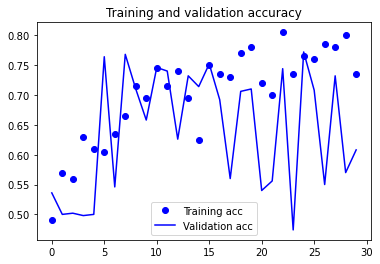

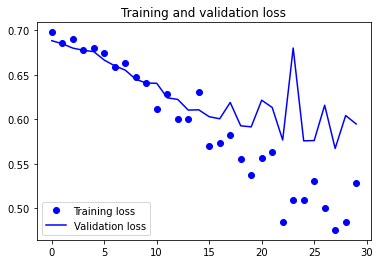

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [17]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 779ms/step - loss: 0.6858 - acc: 0.5383 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 23s 779ms/step - loss: 0.6752 - acc: 0.5900 - val_loss: 0.6750 - val_acc: 0.7580
Epoch 3/30
30/30 [==============================] - 23s 754ms/step - loss: 0.6570 - acc: 0.6950 - val_loss: 0.6695 - val_acc: 0.4900
Epoch 4/30
30/30 [==============================] - 22s 733ms/step - loss: 0.6321 - acc: 0.7300 - val_loss: 0.6407 - val_acc: 0.6680
Epoch 5/30
30/30 [==============================] - 22s 734ms/step - loss: 0.6021 - acc: 0.7417 - val_loss: 0.6286 - val_acc: 0.6080
Epoch 6/30
30/30 [==============================] - 23s 759ms/step - loss: 0.5635 - acc: 0.7100 - val_loss: 0.6085 - val_acc: 0.6640
Epoch 7/30
30/30 [=============================

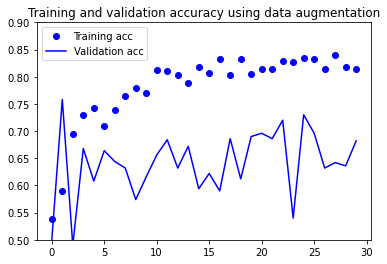

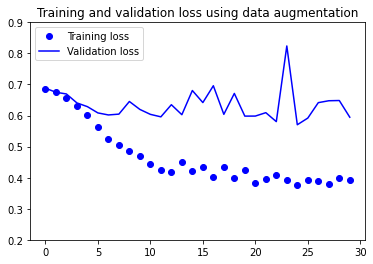

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [23]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [24]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 760ms/step - loss: 0.6426 - acc: 0.6133 - val_loss: 0.6729 - val_acc: 0.5220
Epoch 2/30
30/30 [==============================] - 24s 785ms/step - loss: 0.5911 - acc: 0.6941 - val_loss: 0.7839 - val_acc: 0.4920
Epoch 3/30
30/30 [==============================] - 22s 734ms/step - loss: 0.4630 - acc: 0.7916 - val_loss: 0.7092 - val_acc: 0.6840
Epoch 4/30
30/30 [==============================] - 22s 732ms/step - loss: 0.4870 - acc: 0.8000 - val_loss: 0.5778 - val_acc: 0.6740
Epoch 5/30
30/30 [==============================] - 22s 732ms/step - loss: 0.4446 - acc: 0.7733 - val_loss: 0.5294 - val_acc: 0.7340
Epoch 6/30
30/30 [==============================] - 23s 773ms/step - loss: 0.4928 - acc: 0.7717 - val_loss: 0.5240 - val_acc: 0.7340
Epoch 7/30
30/30 [=============================

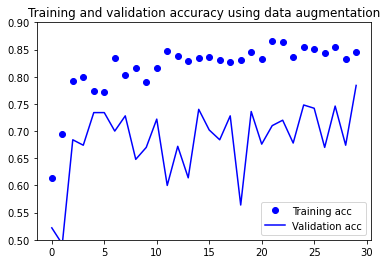

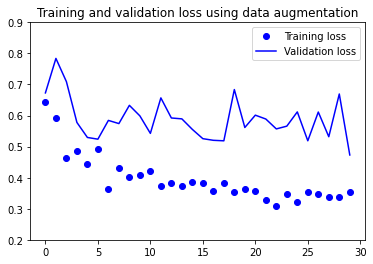

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [29]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 778ms/step - loss: 1.7344 - acc: 0.5350 - val_loss: 0.6852 - val_acc: 0.7120
Epoch 2/30
30/30 [==============================] - 23s 759ms/step - loss: 0.6884 - acc: 0.5650 - val_loss: 0.6781 - val_acc: 0.5160
Epoch 3/30
30/30 [==============================] - 24s 796ms/step - loss: 0.7876 - acc: 0.5500 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7401 - acc: 0.5479 - val_loss: 0.6909 - val_acc: 0.5240
Epoch 5/30
30/30 [==============================] - 23s 774ms/step - loss: 0.6687 - acc: 0.6050 - val_loss: 0.9982 - val_acc: 0.5020
Epoch 6/30
30/30 [==============================] - 22s 741ms/step - loss: 0.6464 - acc: 0.6571 - val_loss: 0.6665 - val_acc: 0.7000
Epoch 7/30
30/30 [=============================

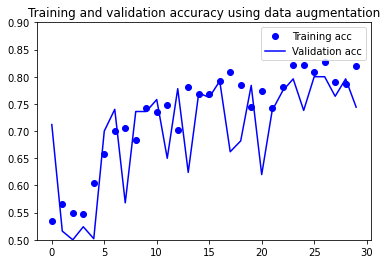

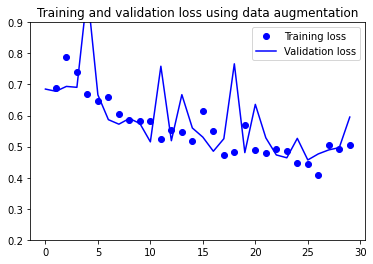

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [31]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [32]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 787ms/step - loss: 1.0493 - acc: 0.5500 - val_loss: 0.6085 - val_acc: 0.7800
Epoch 2/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7468 - acc: 0.6500 - val_loss: 0.5642 - val_acc: 0.7280
Epoch 3/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7143 - acc: 0.5700 - val_loss: 0.6341 - val_acc: 0.5420
Epoch 4/30
30/30 [==============================] - 23s 755ms/step - loss: 0.6609 - acc: 0.6733 - val_loss: 0.7609 - val_acc: 0.5400
Epoch 5/30
30/30 [==============================] - 23s 757ms/step - loss: 0.6627 - acc: 0.6483 - val_loss: 0.5744 - val_acc: 0.7620
Epoch 6/30
30/30 [==============================] - 23s 776ms/step - loss: 0.5365 - acc: 0.7667 - val_loss: 0.8474 - val_acc: 0.5360
Epoch 7/30
30/30 [=============================

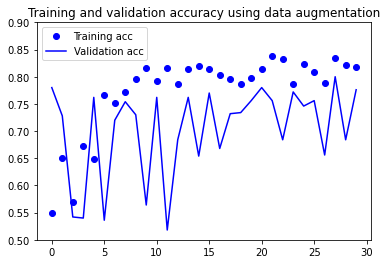

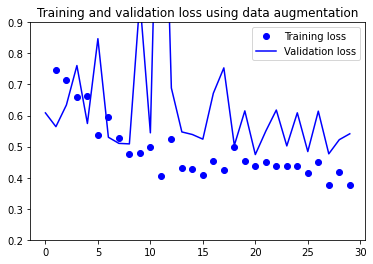

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [34]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.65)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [35]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 23s 733ms/step - loss: 1.1093 - acc: 0.5217 - val_loss: 0.7096 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 22s 732ms/step - loss: 0.6935 - acc: 0.5513 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 22s 725ms/step - loss: 0.7434 - acc: 0.5900 - val_loss: 0.7395 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 24s 813ms/step - loss: 0.6602 - acc: 0.6283 - val_loss: 0.5803 - val_acc: 0.7400
Epoch 5/30
30/30 [==============================] - 24s 780ms/step - loss: 0.7036 - acc: 0.6750 - val_loss: 0.6167 - val_acc: 0.7060
Epoch 6/30
30/30 [==============================] - 22s 729ms/step - loss: 0.6366 - acc: 0.6600 - val_loss: 0.6778 - val_acc: 0.5280
Epoch 7/30
30/30 [=============================

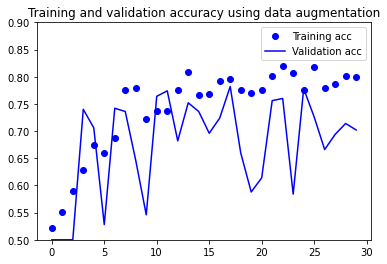

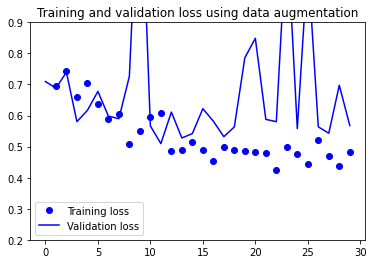

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [37]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [38]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 31s 989ms/step - loss: 0.6845 - acc: 0.5714 - val_loss: 0.6812 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 28s 943ms/step - loss: 0.5982 - acc: 0.6840 - val_loss: 0.6500 - val_acc: 0.4860
Epoch 3/30
30/30 [==============================] - 28s 941ms/step - loss: 0.5638 - acc: 0.7277 - val_loss: 0.6033 - val_acc: 0.6440
Epoch 4/30
30/30 [==============================] - 28s 937ms/step - loss: 0.5275 - acc: 0.7328 - val_loss: 0.7398 - val_acc: 0.4680
Epoch 5/30
30/30 [==============================] - 28s 944ms/step - loss: 0.5305 - acc: 0.7233 - val_loss: 0.7729 - val_acc: 0.4740
Epoch 6/30
30/30 [==============================] - 30s 984ms/step - loss: 0.4963 - acc: 0.7350 - val_loss: 0.5895 - val_acc: 0.7520
Epoch 7/30
30/30 [=============================

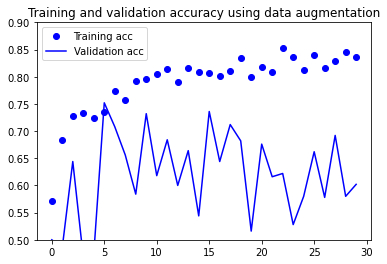

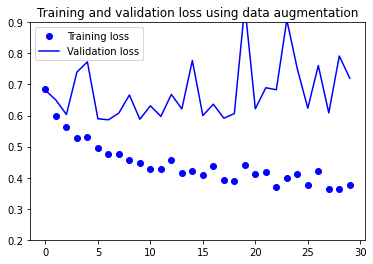

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [40]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [41]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 29s 928ms/step - loss: 0.7462 - acc: 0.5433 - val_loss: 0.6353 - val_acc: 0.7800
Epoch 2/30
30/30 [==============================] - 28s 927ms/step - loss: 0.5942 - acc: 0.6917 - val_loss: 0.6621 - val_acc: 0.5200
Epoch 3/30
30/30 [==============================] - 28s 927ms/step - loss: 0.5332 - acc: 0.7350 - val_loss: 0.6330 - val_acc: 0.6720
Epoch 4/30
30/30 [==============================] - 28s 945ms/step - loss: 0.4448 - acc: 0.7983 - val_loss: 0.8113 - val_acc: 0.5540
Epoch 5/30
30/30 [==============================] - 28s 926ms/step - loss: 0.4411 - acc: 0.8033 - val_loss: 0.5766 - val_acc: 0.7140
Epoch 6/30
30/30 [==============================] - 28s 925ms/step - loss: 0.4128 - acc: 0.8185 - val_loss: 0.6107 - val_acc: 0.6680
Epoch 7/30
30/30 [=============================

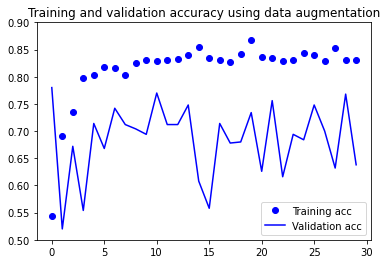

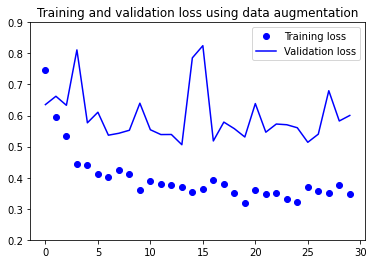

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [43]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [44]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 29s 953ms/step - loss: 5.4026 - acc: 0.5092 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 29s 961ms/step - loss: 0.8571 - acc: 0.5059 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 28s 933ms/step - loss: 1.9454 - acc: 0.5783 - val_loss: 0.6508 - val_acc: 0.7600
Epoch 4/30
30/30 [==============================] - 28s 934ms/step - loss: 0.8378 - acc: 0.6117 - val_loss: 0.6822 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 28s 927ms/step - loss: 0.6795 - acc: 0.6383 - val_loss: 1.1128 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 28s 926ms/step - loss: 0.7750 - acc: 0.6454 - val_loss: 0.7745 - val_acc: 0.5140
Epoch 7/30
30/30 [=============================

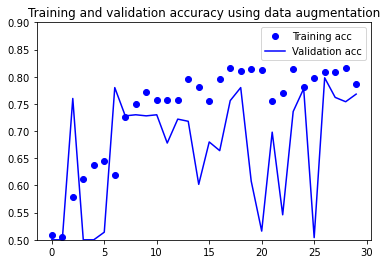

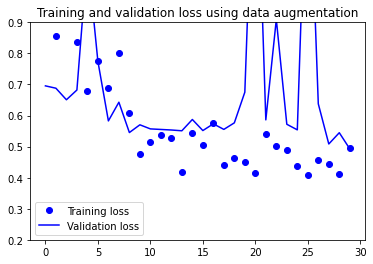

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()